# Running OTVelo on curated network datasets

This notebook shows how to reproduce results associated with the curated network dataset (Fig. 3 and 4)

In [ ]:
# %matplotlib notebook
import numpy as np
import pandas as pd
import sys
import sklearn
sys.path.append('../Utils')
sys.path.append('../Data')
#import torch
from utils_Velo import *

from utils import *
import scipy
import matplotlib.pyplot as plt
import test_batch_BEELINE
from test_batch_BEELINE import batch_test_BEELINE
from test_batch_BEELINE import load_others_result_BEELINE
%load_ext autoreload
%autoreload 2

## Download datasets

Before running the algorithm, make sure to download the original data for the curated datasets first.

They can be found from the GitHub repo of BEELINE: https://zenodo.org/records/3701939

Under GPL 3.0 license, the datasets have been provided in this repository.

In [ ]:
data = ['mCAD','GSD','HSC','VSC']
branches = [2,2,4,5]

branch = False
counter = -1
for example in data:
    counter += 1
    #for branch_no in range(-1,0):#, 
    for branch_no in range(-1,branches[counter]):
        
        AUROC, AUPRC = batch_test_BEELINE(example,list(range(1,11)), modality='Granger', branch_no = branch_no,save=True, penalty='EN')
        AUROC, AUPRC = batch_test_BEELINE(example,list(range(1,11)), modality='Corr', branch_no = branch_no,save=True)
        
        for dp in [50,70]:
            AUROC, AUPRC = batch_test_BEELINE(example,list(range(1,11)), modality='Granger', dropout=dp, branch_no = branch_no,save=True, penalty='EN')
            AUROC, AUPRC = batch_test_BEELINE(example,list(range(1,11)), modality='Corr', dropout=dp, branch_no = branch_no,save=True)
        


## Visualize results

After running the scripts, the resulting GRNs are automatically saved under ```Data/Curated/(networkname)/OTVelo-Corr``` and ```Data/Curated/(networkname)/OTVelo-Granger```. The output files have been provided under the repo already. We can quantify the performance via boxplots like Fig.3-4 in paper. 

The block below shows the box plots of AUPRC ratio on the 4 datasets with zero dropouts.

Branches, sum: HARISSA, Average rescaled:0.5879705003491917
Branches, sum: CARDAMOM, Average rescaled:0.5586460587651347
Branches, sum: GENIE3, Average rescaled:0.5173807580184098
Branches, sum: SINCERITIES, Average rescaled:0.6757184981308284
Branches, sum: OTVelo-Corr, Average rescaled:0.6876410846701392
Branches, sum: OTVelo-Granger, Average rescaled:0.6610077171445949
[0.4, 1.6]
Branches, sum: HARISSA, Average rescaled:0.5633937201561808
Branches, sum: CARDAMOM, Average rescaled:0.48269948811641905
Branches, sum: GENIE3, Average rescaled:0.7339594567773426
Branches, sum: SINCERITIES, Average rescaled:0.3596207955355326
Branches, sum: OTVelo-Corr, Average rescaled:0.6076147652160899
Branches, sum: OTVelo-Granger, Average rescaled:0.4151682865136359
[0.2, 4.0]


/var/folders/k7/s0t_zwg11h56xb5xp339s5pm0000gp/T/ipykernel_81089/514780360.py:147: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


Branches, sum: HARISSA, Average rescaled:0.2724219666838936
Branches, sum: CARDAMOM, Average rescaled:0.3169453197966209
Branches, sum: GENIE3, Average rescaled:0.4563182748342325
Branches, sum: SINCERITIES, Average rescaled:0.2597919396212026
Branches, sum: OTVelo-Corr, Average rescaled:0.4811327082732442
Branches, sum: OTVelo-Granger, Average rescaled:0.3782286129471011
[0.3, 2.2]


/var/folders/k7/s0t_zwg11h56xb5xp339s5pm0000gp/T/ipykernel_81089/514780360.py:147: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


Branches, sum: HARISSA, Average rescaled:0.24836175943728067
Branches, sum: CARDAMOM, Average rescaled:0.2605954078591596
Branches, sum: GENIE3, Average rescaled:0.2784852554253333
Branches, sum: SINCERITIES, Average rescaled:0.2514839323830623
Branches, sum: OTVelo-Corr, Average rescaled:0.362041734861925
Branches, sum: OTVelo-Granger, Average rescaled:0.3720108782070263
[0.4, 1.9]


/var/folders/k7/s0t_zwg11h56xb5xp339s5pm0000gp/T/ipykernel_81089/514780360.py:147: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


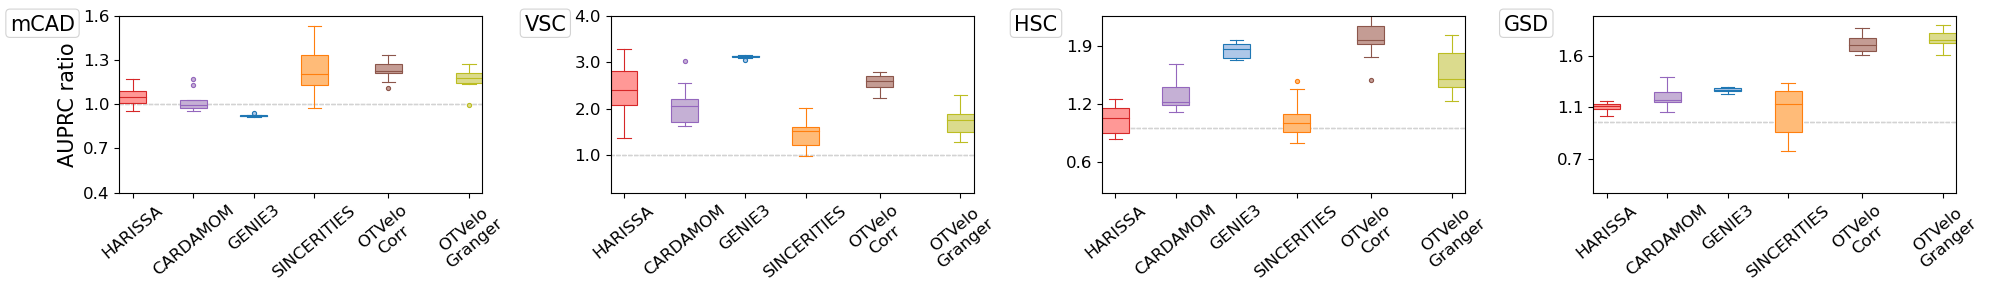

In [11]:
data = ['mCAD','VSC','HSC','GSD']
#data = ['VSC']
plt.rcParams["font.size"] = 16
plt.rcParams["figure.figsize"] = (16,2.5)
plt.rcParams["figure.figsize"] = (20,3)
branch = True

sign = None# 
sign = 'signed'
dps = [None]#, 50, 70]

ylims = [ [0.4,1.6], [0.2,4.0], [0.3,2.2], [0.4,1.9] ]
metric = 'AUPRC ratio'
#metric = 'EP ratio'

cmap = plt.get_cmap('tab20')
c = {'HARISSA': (cmap(6), cmap(7)), 'CARDAMOM': (cmap(8), cmap(9)),
    'GENIE3': (cmap(0), cmap(1)), 'SINCERITIES': (cmap(2), cmap(3)),
    'Random': 2*('lightgray',),
      'OTVelo-Corr': (cmap(10), cmap(11)),   'OTVelo\nCorr': (cmap(10), cmap(11)), 
    'Ours tuned': (cmap(18),cmap(19)), 'Ours tuned signed': (cmap(10), cmap(11)),
    'OTVelo-Granger': (cmap(16),cmap(17)),'OTVelo\nGranger': (cmap(16),cmap(17)),
    'OTVelo-CV': (cmap(14), cmap(15)),'OTVelo\nCV': (cmap(14),cmap(15))}
if len(dps) > 1:
    opt_box = {'patch_artist': True, 'widths': [.2]}
else:
    opt_box = {'patch_artist': True, 'widths': [.4]}
def configure_box(box, c):
    w = 0.8
    for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
        plt.setp(box[item], color=c[0], lw=w)
    plt.setp(box['boxes'], facecolor=c[1])
    plt.setp(box['fliers'], markeredgecolor=c[0], ms=3, markerfacecolor=c[1],
        markeredgewidth=w)

plt.rcParams["font.size"] = 10

methods = ['HARISSA','CARDAMOM','GENIE3','SINCERITIES','OTVelo-Corr','OTVelo-Granger']#,'Ourspenaltyl2','Ourspenaltytune']#,'Ours_tuned','Ours_corr_tuned']
methods_name = ['HARISSA','CARDAMOM','GENIE3','SINCERITIES','OTVelo\nCorr','OTVelo\nGranger']#,'Ours_l2','Ours_LOOCV']#,'Ours_tuned','Ours_corr_tuned']
pos = [0., 0.9, 1.8, 2.7,3.8,5.0]

if sign != None:
    methods = ['HARISSA','CARDAMOM','SINCERITIES','OTVelo-Corr','OTVelo-Granger']
    methods_name = ['HARISSA','CARDAMOM','SINCERITIES','OTVelo\nCorr','OTVelo\nGranger']
    pos = [0., 1.0, 2.0, 3.1,4.2]

methods_label = []
for i in range( len( methods)):
    if len(dps) == 3:
        methods_label += [None] + [methods_name[i]]+[None]
    else:
        methods_label += [methods_name[i]]

dx = {None: 0.0,50:0.2,70:0.4}
counter = 0
for example in data:
    counter += 1
    counter_method = -1
    ax = plt.subplot(1,len(data),counter)
    
    for method in methods:#,'Ourspenaltyl2','Ourspenaltytune']:
        counter_method += 1
        
        for dp in dps:
           
            penalty = 'EN'
            if method == 'OTVelo-CV':
                penalty = 'CV'
            AUROC, AUPRC, EP, random = load_others_result_BEELINE(example,method, list(range(1,11)),dropout = dp,branch=branch, combine='max', sign = sign, penalty=penalty)
            
            #ax.plot([-1,10], [random,random], color='lightgray', ls='--', lw=0.8, zorder=0)
            
            if metric == 'AUPRC':
                box = ax.boxplot( AUPRC, positions = [pos[counter_method]+dx[dp]], **opt_box )
                ax.plot([-1,10], [random,random], color='lightgray', ls='--', lw=0.8, zorder=0)
            elif metric == 'AUROC':
                box = ax.boxplot( AUROC, positions = [pos[counter_method]+dx[dp]], **opt_box )
                ax.plot([-1,10], [0.5,0.5], color='lightgray', ls='--', lw=0.8, zorder=0)
            elif metric == 'EP':
                box = ax.boxplot( EP, positions = [pos[counter_method]+dx[dp]], **opt_box )
                ax.plot([-1,10], [random,random], color='lightgray', ls='--', lw=0.8, zorder=0)
            elif metric == 'AUPRC ratio':
                box = ax.boxplot( AUPRC/random, positions = [pos[counter_method]+dx[dp]], **opt_box )
                ax.plot([-1,10], [1,1], color='lightgray', ls='--', lw=0.8, zorder=0)
            elif metric == 'EP ratio':
                box = ax.boxplot( EP/random, positions = [pos[counter_method]+dx[dp]], **opt_box )
                ax.plot([-1,10], [1,1], color='lightgray', ls='--', lw=0.8, zorder=0)
            configure_box(box, c[method])
        
            print('Branches, sum: '+method+', Average rescaled:'+str(np.median(AUPRC))  )
    if metric != 'AUPRC ratio' and metric != 'EP ratio':
        
        ax.set_ylim([0,1])
    else:
        ax.set_ylim( ylims[counter-1] )

    plt.xlim([-0.2, pos[-1]+0.2 + 0.2*(len(dps)-1) ])
    
    
    ax.set_xticklabels( methods_label, fontsize=12, rotation=40)

    if metric == 'AUROC':
        ax.set_yticks([0,0.2,0.4,0.6,0.8,1])
        ax.set_yticklabels([0,0.2,0.4,0.6,0.8,1],fontsize=12)
        plt.ylim([0.0,1.02])
    elif metric == 'AUPRC' or metric == 'EP':
        ax.set_yticks([0,0.2,0.4,0.6,0.8,1])
        ax.set_yticklabels([0,0.2,0.4,0.6,0.8,1],fontsize=12)
        plt.ylim([0,1.02])
    else:
        ticks = ax.get_yticks()
        ticks = np.linspace( ticks[0],ticks[-1], 5)
        
        import matplotlib.ticker as ticker
        ax.set_yticks(ticks)
        ax.set_yticklabels( ticker.FormatStrFormatter('%.1f').format_ticks(ticks),fontsize=12 )
        #plt.ylim([max([0.5,ticks[0]]), ticks[-1]])
        #plt.ylim(ylims[counter-1])
    

    x, y = -11, 10
    xn, yn = -0.142, 0.875
    optn = {'fontsize': 15, 'transform': ax.transAxes, 'ha': 'right'}
    if sign == None or sign == 'signed':
        ax.text(xn+0.02, yn+0.04, example, **optn)
        ax.text(xn+0.02, yn+0.05, example, color='none', zorder=0, bbox=dict(
                boxstyle='round,pad=0.2',fc='none',ec='lightgray',lw=0.8), **optn)
        if counter == 1:
            if sign == None:
                ax.set_ylabel(metric,fontsize=15)
            else:
                ax.set_ylabel(metric+' (signed)',fontsize=10)
    #print(random)
    if metric != 'AUPRC ratio' and metric != 'EP ratio':
        
        ax.set_ylim([0,1])
    else:
        ax.set_ylim( ylims[counter-1] )
    print(ylims[counter-1])
    
    # ax.text(0.25,-0.25, "split", size=15, ha="center", 
    #      transform=ax.transAxes)
    
    # ax.text(0.75,-0.25, "combined", size=15, ha="center", 
    #      transform=ax.transAxes)
    
    plt.tight_layout()


plt.show()





